In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("owid-covid-data.xlsx")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
#code that filters out European countries
european_countries = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
    'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
    'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
    'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania',
    'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia',
    'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'
]

# subset for European countries
europe_data = data[data['location'].isin(european_countries)]
europe_data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
2714,ALB,Europe,Albania,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2715,ALB,Europe,Albania,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2716,ALB,Europe,Albania,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2717,ALB,Europe,Albania,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2718,ALB,Europe,Albania,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN


In [9]:
# create a table that shows the number of features with more than 30% missing values for each country
def missing_features_by_country(df):

    missingness = df.groupby('location').apply(lambda group: group.isna().mean() * 100)
    
    # Count the number of features with more than 30% missing values for each country
    features_missing_40 = (missingness > 40).sum(axis=1)
    
    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Country': features_missing_40.index,
        'Features with >40% Missingness': features_missing_40.values
    })
    
    return summary.sort_values(by='Features with >40% Missingness', ascending=True)

# Calculate and display the results
missing_features_summary = missing_features_by_country(europe_data)
print(missing_features_summary)

                   Country  Features with >40% Missingness
21                   Italy                               7
6                  Belgium                               9
12                 Estonia                              11
43                   Spain                              14
26               Lithuania                              14
14                  France                              15
11                 Denmark                              16
20                 Ireland                              16
27              Luxembourg                              18
45             Switzerland                              19
17                  Greece                              19
35                  Poland                              21
36                Portugal                              22
16                 Germany                              22
41                Slovakia                              22
13                 Finland                              

In [15]:
# check for overall missingness
missing_values_by_location = europe_data.groupby('location').apply(lambda x: x.isnull().sum())
missing_values_df = pd.DataFrame(missing_values_by_location)
columns_to_exclude = ["iso_code", "continent", "location", "date"]
missing_values_df['sum_missing'] = missing_values_df.drop(columns=columns_to_exclude).sum(axis=1)
missing_total_by_location = missing_values_df[['location', 'sum_missing']]
missing_total_by_location = missing_total_by_location.sort_values(by='sum_missing', ascending=True)
missing_total_by_location.head(20)

,location,sum_missing
location,,
Italy,0,18094
Belgium,0,20668
France,0,21166
Estonia,0,23902
Switzerland,0,25625
Spain,0,25661
Lithuania,0,26176
Luxembourg,0,26640
Ireland,0,27108


In [26]:
# pick countries that have relatively low missingness and that are adjacent 
country_list = [
    'Spain', 'France', 'Germany', 'Ireland', 'United Kingdom',
    'Italy', 'Belgium', 'Netherlands', 'Switzerland', 'Luxembourg'
]
selected_data = europe_data[europe_data['location'].isin(country_list)]
selected_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
28497,BEL,Europe,Belgium,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,NaN,NaN,NaN,NaN
28498,BEL,Europe,Belgium,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,NaN,NaN,NaN,NaN
28499,BEL,Europe,Belgium,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,-151.3,-6.34,-6.34,-13.086293
28500,BEL,Europe,Belgium,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,NaN,NaN,NaN,NaN
28501,BEL,Europe,Belgium,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,NaN,NaN,NaN,NaN


In [27]:
# number of available data from different days
date_count_by_location = selected_data.groupby('location')['date'].nunique()
date_count_by_location_sorted = date_count_by_location.sort_values(ascending=True)
date_count_by_location_sorted

location
Belgium           1357
France            1357
Germany           1357
Ireland           1357
Italy             1357
Luxembourg        1357
Netherlands       1357
Spain             1357
Switzerland       1357
United Kingdom    1357
Name: date, dtype: int64

In [28]:
# check for missingness by country
missing_values_by_location = selected_data.groupby('location').apply(lambda x: x.isnull().sum())
missing_values_df = pd.DataFrame(missing_values_by_location)
missing_values_df.to_csv('missing_values.csv')

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_3314/2298412374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['date'] = pd.to_datetime(selected_data['date'])
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_3314/2298412374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.sort_index(inplace=True)


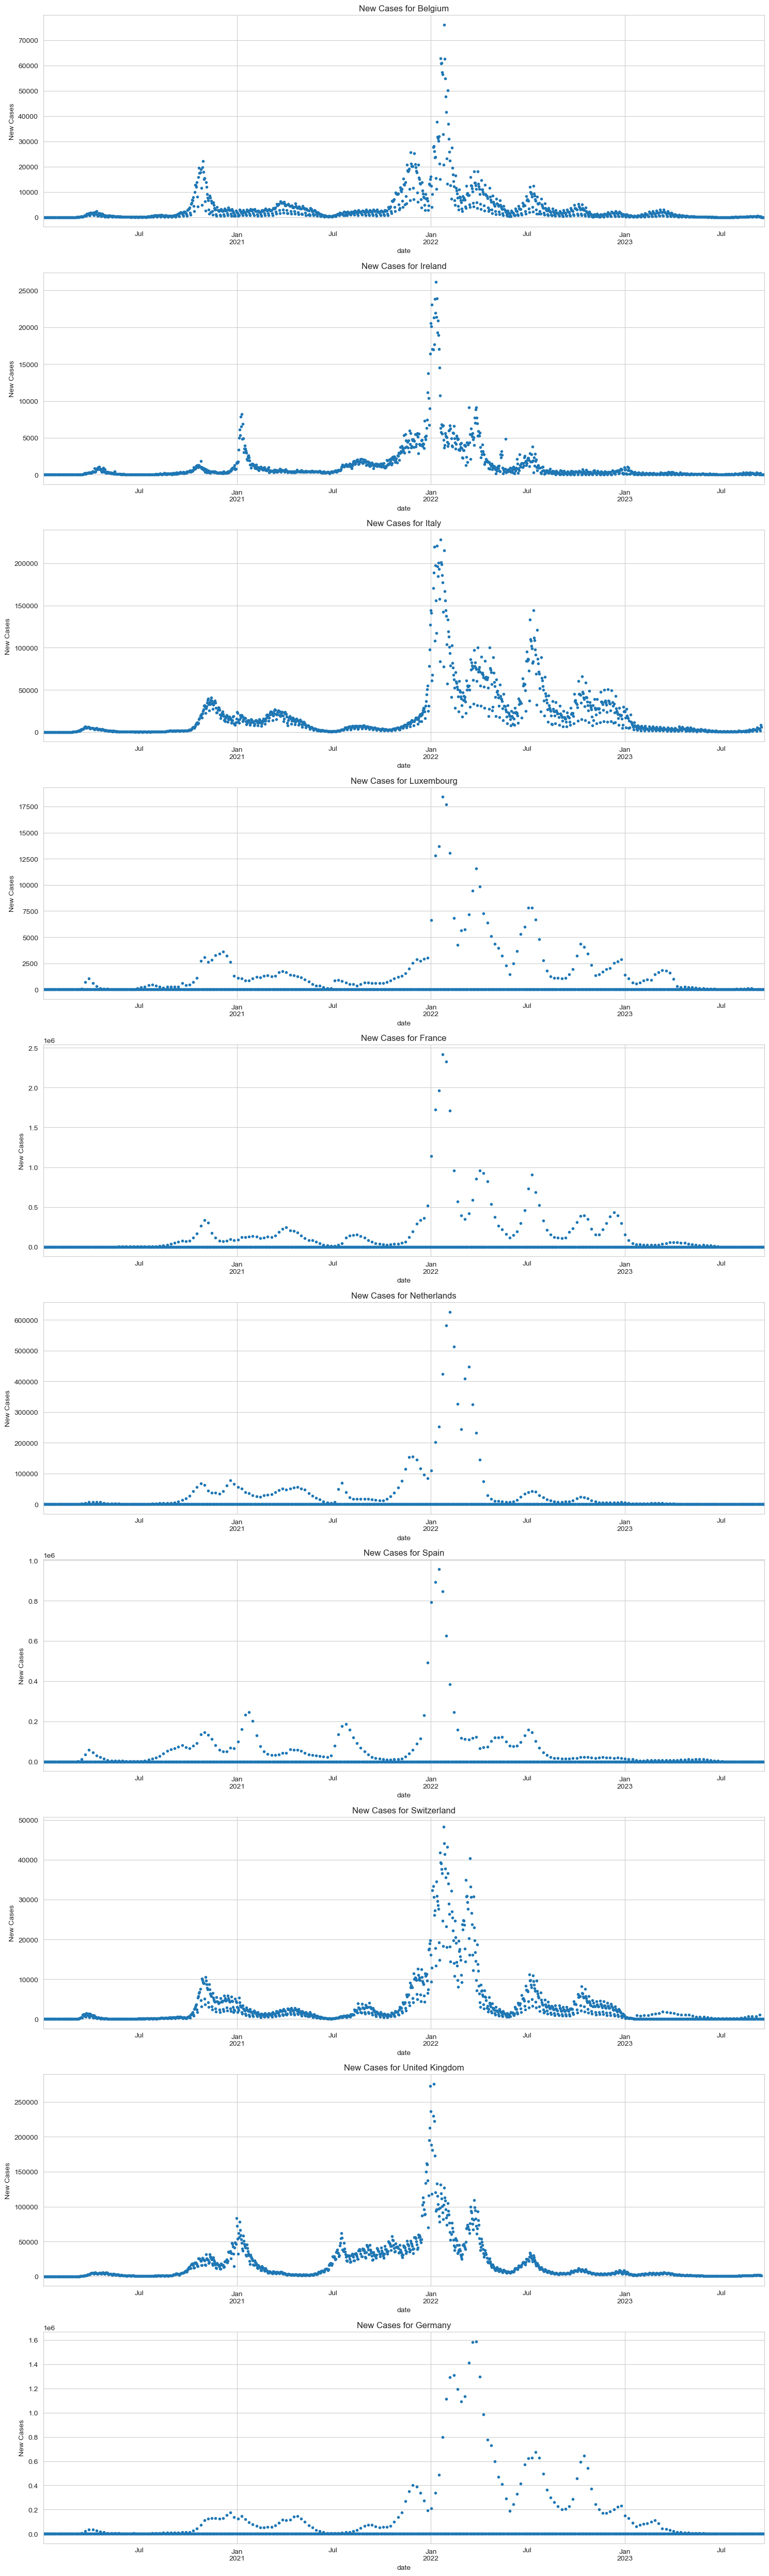

In [82]:
#data_clean_imputed['date'] = pd.to_datetime(data_clean_imputed['date'])
#data_clean_imputed.set_index('date', inplace=True)

selected_data['date'] = pd.to_datetime(selected_data['date'])
selected_data.set_index('date', inplace=True)
selected_data.sort_index(inplace=True)
locations = selected_data['location'].unique()

plt.figure(figsize=(15, 5 * len(locations)))

for i, location in enumerate(locations, 1):
    plt.subplot(len(locations), 1, i)
    selected_data[selected_data['location'] == location]['new_cases'].plot(style='.', title=f'New Cases for {location}')
    plt.ylabel('New Cases')

plt.tight_layout()
plt.show()

We observed zeros in many different countries; this can be attributed to the fact that some countries report weekly instead of daily. Therefore we decided to use new_cases_smoothed as are target variable. 

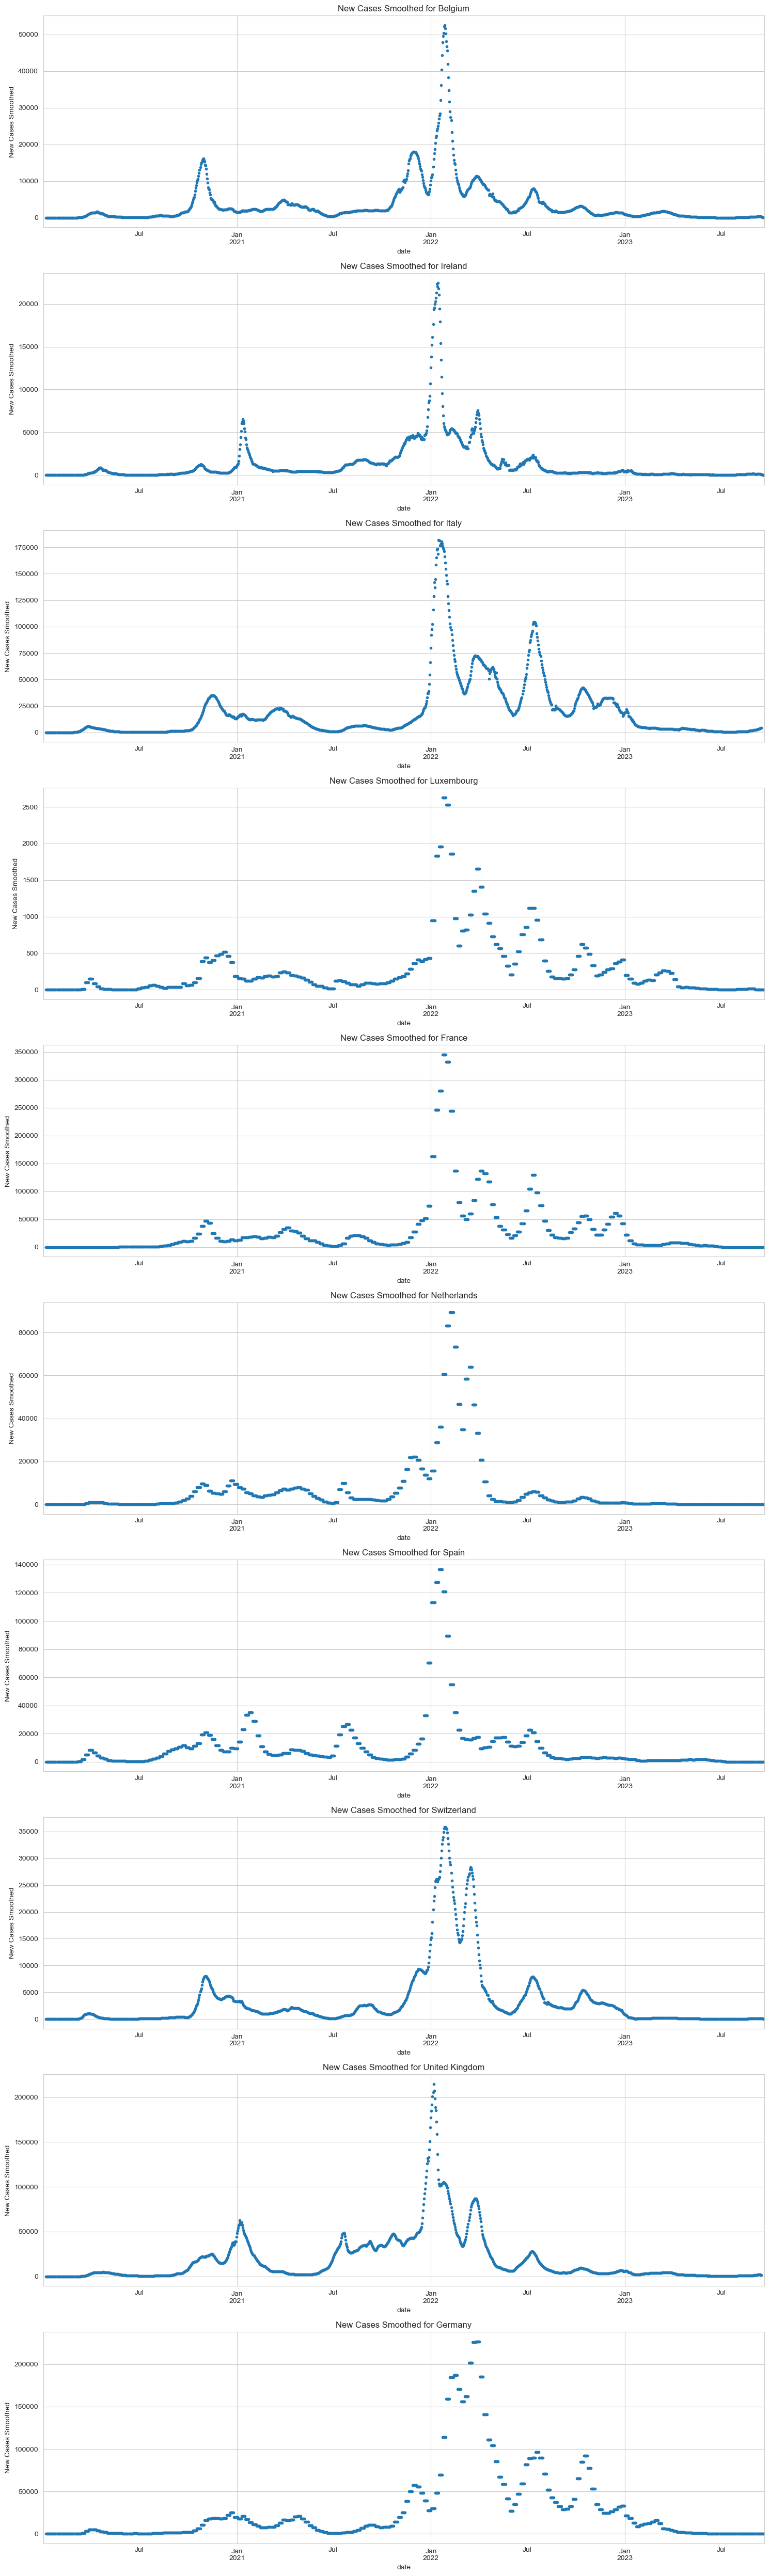

In [87]:
plt.figure(figsize=(15, 5 * len(locations)))

for i, location in enumerate(locations, 1):
    plt.subplot(len(locations), 1, i)
    selected_data[selected_data['location'] == location]['new_cases_smoothed'].plot(style='.', title=f'New Cases Smoothed for {location}')
    plt.ylabel('New Cases Smoothed')

plt.tight_layout()
plt.show()

## Data Cleaning

In [88]:
#data missingness
missing_data = selected_data.isnull().sum()
threshold = 0.3 * len(selected_data)
missing_data = missing_data[missing_data < threshold]
missing_data

iso_code                              0
continent                             0
location                              0
total_cases                         358
new_cases                            12
new_cases_smoothed                   62
total_deaths                        525
new_deaths                            6
new_deaths_smoothed                  56
total_cases_per_million             358
new_cases_per_million                12
new_cases_smoothed_per_million       62
total_deaths_per_million            525
new_deaths_per_million                6
new_deaths_smoothed_per_million      56
reproduction_rate                  3236
icu_patients                       3702
icu_patients_per_million           3702
stringency_index                   2630
population_density                    0
median_age                            0
aged_65_older                         0
aged_70_older                         0
gdp_per_capita                        0
cardiovasc_death_rate                 0


In [89]:
# drop features with >30% missingness
data_clean = selected_data.dropna(thresh=threshold, axis=1)

In [85]:
#impute using KNN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

numeric_cols = data_clean.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
data_clean_scaled = data_clean.copy()
data_clean_scaled[numeric_cols] = scaler.fit_transform(data_clean[numeric_cols])


imputer = KNNImputer(n_neighbors=5)
data_clean_scaled[numeric_cols] = imputer.fit_transform(data_clean_scaled[numeric_cols])

data_clean_imputed = data_clean.copy()
data_clean_imputed[numeric_cols] = scaler.inverse_transform(data_clean_scaled[numeric_cols])

missing_values_count = data_clean_imputed.isnull().sum()
missing_values_count[missing_values_count > 0]


tests_units    5501
dtype: int64

## Time Series Decomposition

<Figure size 1000x600 with 0 Axes>

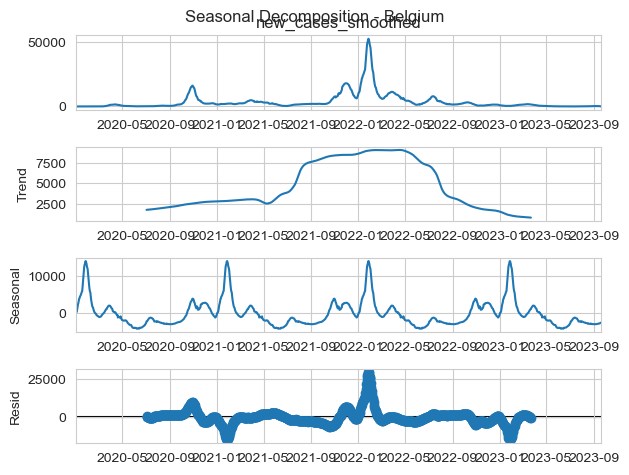

<Figure size 1000x600 with 0 Axes>

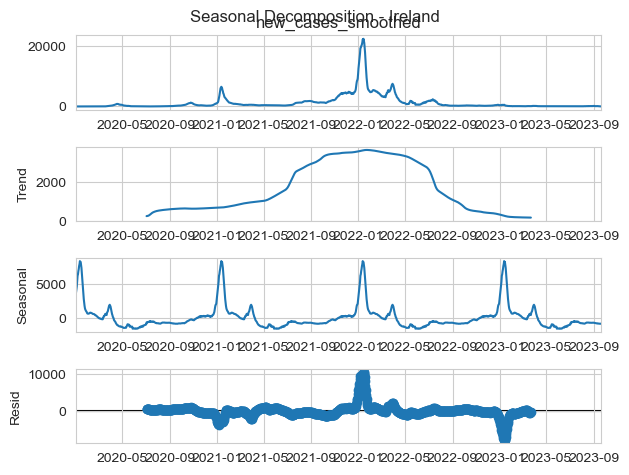

<Figure size 1000x600 with 0 Axes>

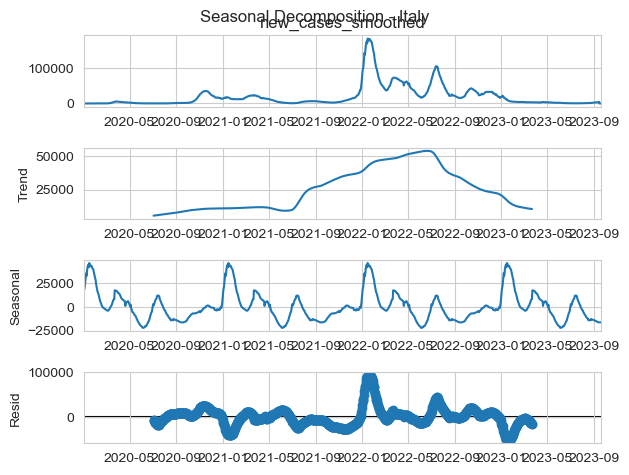

<Figure size 1000x600 with 0 Axes>

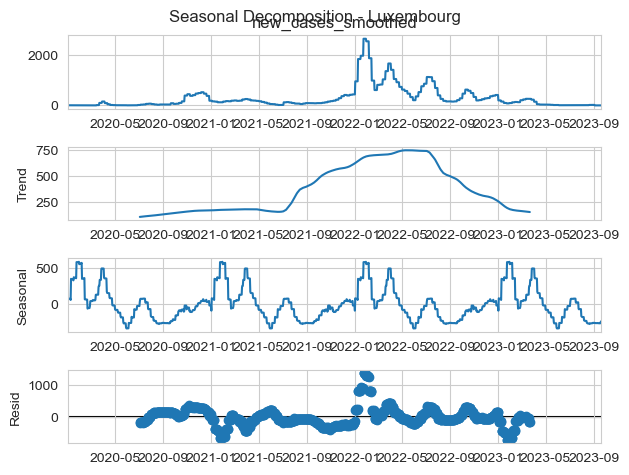

<Figure size 1000x600 with 0 Axes>

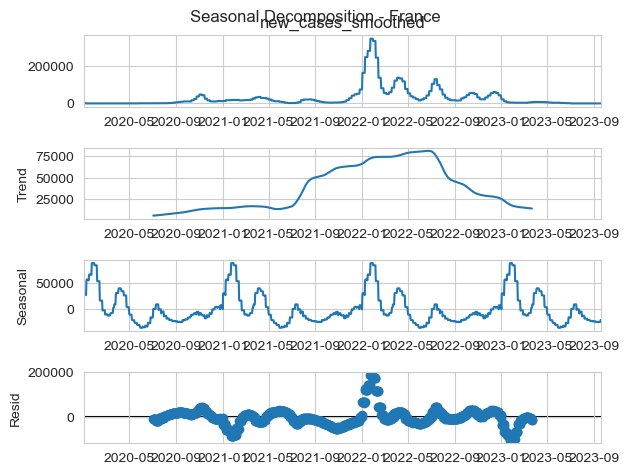

<Figure size 1000x600 with 0 Axes>

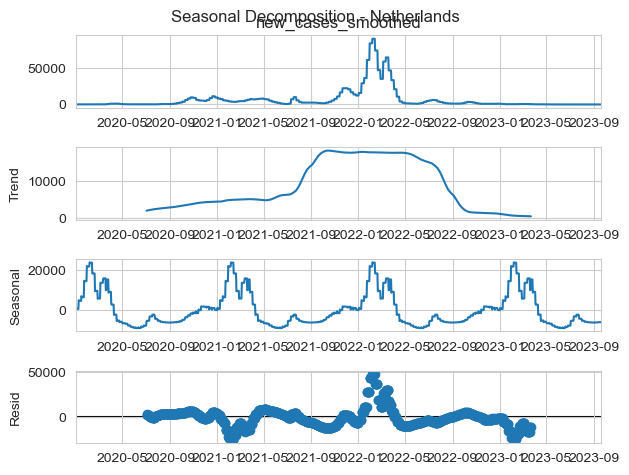

<Figure size 1000x600 with 0 Axes>

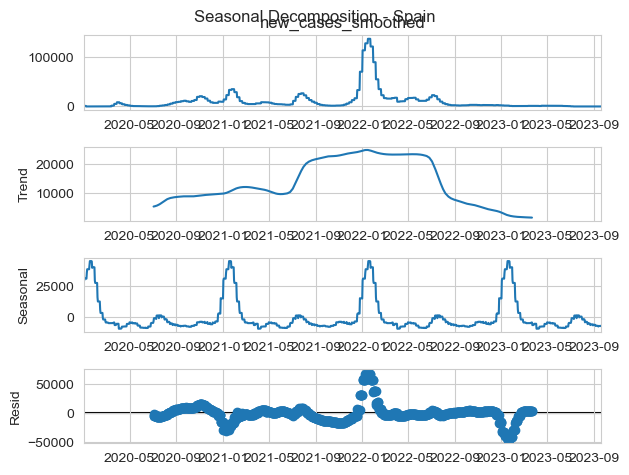

<Figure size 1000x600 with 0 Axes>

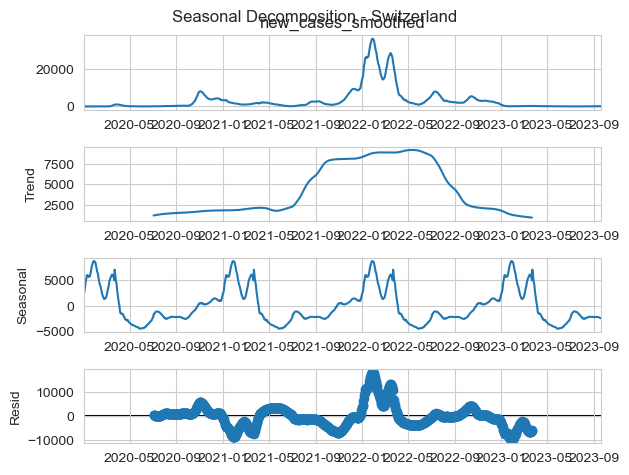

<Figure size 1000x600 with 0 Axes>

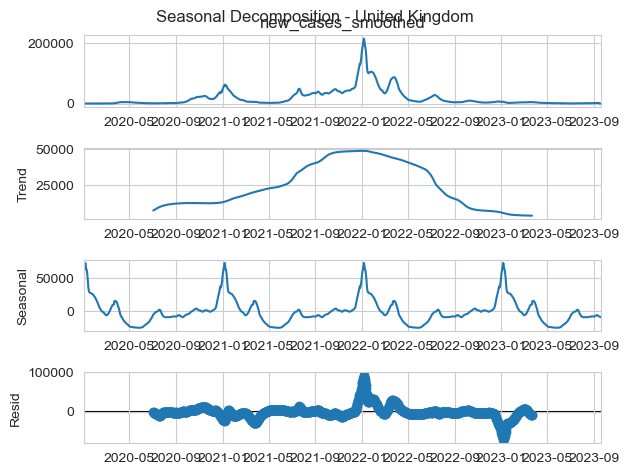

<Figure size 1000x600 with 0 Axes>

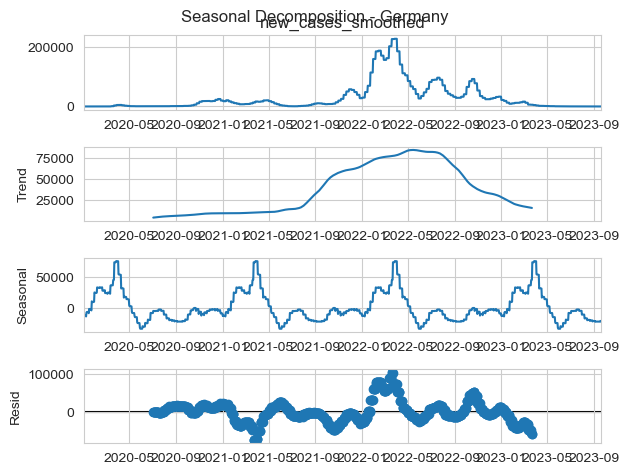

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


for country in data_clean_imputed['location'].unique():
    country_data = data_clean_imputed[data_clean_imputed['location'] == country]
    result = seasonal_decompose(country_data['new_cases_smoothed'], period=365)
    
    plt.figure(figsize=(10, 6))
    result.plot()
    plt.suptitle(f'Seasonal Decomposition - {country}')
    plt.show()



## Time Series Data Stationary

In [91]:
from statsmodels.tsa.stattools import adfuller

for country in data_clean_imputed['location'].unique():
    country_data = data_clean_imputed[data_clean_imputed['location'] == country]
    result = adfuller(country_data['new_cases_smoothed'].values)
    
    print(f'Results for {country}:')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('---------------------------------------------')


Results for Belgium:
ADF Statistic: -3.185635
p-value: 0.020831
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Ireland:
ADF Statistic: -3.228222
p-value: 0.018408
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Italy:
ADF Statistic: -3.244839
p-value: 0.017532
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Luxembourg:
ADF Statistic: -3.176561
p-value: 0.021382
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for France:
ADF Statistic: -3.931993
p-value: 0.001812
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Netherlands:
ADF Statistic: -2.848234
p-value: 0.051707
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for 

## Feature Creation

### Auto Correlation

### Rolling and Lag Features

In [92]:
# lagged features with new_cases
for lag in [1, 7, 14]:
    data_clean_imputed[f'new_cases_lag{lag}'] = data_clean_imputed['new_cases_smoothed'].shift(lag)

In [93]:
# rolling window 7-day and 14-day for new_cases
for window in [7, 14]:
    data_clean_imputed[f'new_cases_roll_mean{window}'] = data_clean_imputed['new_cases_smoothed'].rolling(window=window).mean()
    data_clean_imputed[f'new_cases_roll_std{window}'] = data_clean_imputed['new_cases_smoothed'].rolling(window=window).std()

In [94]:
data_clean_imputed.head(10)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,life_expectancy,human_development_index,population,new_cases_lag1,new_cases_lag7,new_cases_lag14,new_cases_roll_mean7,new_cases_roll_std7,new_cases_roll_mean14,new_cases_roll_std14
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,BEL,Europe,Belgium,4812396.0,0.0,0.0000,34339.0,0.0,-1.421085e-14,412871.2930,...,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,IRL,Europe,Ireland,1719649.0,0.0,0.0000,9203.2,0.0,-1.421085e-14,342347.6060,...,82.30,0.955,5023108.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,ITA,Europe,Italy,26007789.0,0.0,0.0000,191469.0,0.0,-1.421085e-14,440530.1940,...,83.51,0.892,59037472.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,LUX,Europe,Luxembourg,377825.2,0.0,4.2860,994.0,0.0,2.286000e-01,583422.8176,...,82.25,0.916,647601.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,FRA,Europe,France,38709812.6,0.0,2573.5430,166373.0,0.0,2.514280e+01,598976.2454,...,82.66,0.901,67813000.0,4.2860,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NLD,Europe,Netherlands,8602611.8,0.0,98.9432,22986.0,0.0,-1.421085e-14,489786.0400,...,82.28,0.944,17564020.0,2573.5430,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,ESP,Europe,Spain,13943724.4,0.0,1111.8856,120703.8,0.0,7.514200e+00,293190.1906,...,83.56,0.904,47558632.0,98.9432,NaN,NaN,541.236829,984.772406,NaN,NaN
2020-01-03,CHE,Europe,Switzerland,4406288.8,0.0,154.6856,14029.6,0.0,2.860000e-01,504124.8692,...,83.78,0.955,8740471.0,1111.8856,0.0,NaN,563.334771,972.259093,NaN,NaN
2020-01-03,GBR,Europe,United Kingdom,24715857.0,0.0,0.0000,229307.0,0.0,-1.421085e-14,366112.3770,...,81.32,0.932,67508936.0,154.6856,0.0,NaN,563.334771,972.259093,NaN,NaN


### Additional Features 

In [95]:
# Data time features
data_clean_imputed['day_of_week'] = data_clean_imputed.index.dayofweek
# 0 refers to Monday and 6 to Sunday, we want to tell if the date is weekend or not
data_clean_imputed['weekend'] = np.where(data_clean_imputed['day_of_week'].isin([5, 6]), 1, 0)
# To display the 'date', 'day_of_week', and 'weekend' columns, reset the index temporarily
data_clean_imputed.head(2)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,population,new_cases_lag1,new_cases_lag7,new_cases_lag14,new_cases_roll_mean7,new_cases_roll_std7,new_cases_roll_mean14,new_cases_roll_std14,day_of_week,weekend
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,BEL,Europe,Belgium,4812396.0,0.0,0.0,34339.0,0.0,-1.421085e-14,412871.293,...,11655923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
2020-01-03,IRL,Europe,Ireland,1719649.0,0.0,0.0,9203.2,0.0,-1.421085e-14,342347.606,...,5023108.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4,0


In [98]:
adjacent_countries = {
    'Spain': ['France'],
    'France': ['Spain', 'Belgium', 'Germany', 'Italy', 'Switzerland', 'Luxembourg'],
    'Germany': ['France', 'Belgium', 'Netherlands', 'Switzerland', 'Luxembourg'],
    'Ireland': ['United Kingdom'],
    'United Kingdom': ['Ireland'],
    'Italy': ['France', 'Switzerland'],
    'Belgium': ['France', 'Germany', 'Netherlands', 'Luxembourg'],
    'Netherlands': ['Germany', 'Belgium'],
    'Switzerland': ['France', 'Germany', 'Italy'],
    'Luxembourg': ['France', 'Germany', 'Belgium']
}

data_clean_imputed['adjacent_new_cases'] = 0

for country in adjacent_countries:
    if country in data_clean_imputed['location'].unique():
        adjacent_data = data_clean_imputed[data_clean_imputed['location'].isin(adjacent_countries[country])]
        daily_sum = adjacent_data.groupby('date')['new_cases_smoothed'].sum()
        country_data = data_clean_imputed[data_clean_imputed['location'] == country]
        country_data = pd.merge(country_data, daily_sum, how='left', left_index=True, right_index=True, suffixes=('', '_adjacent'))
        if country in adjacent_countries[country]:
            country_data['adjacent_new_cases'] -= country_data['new_cases_smoothed']
    data_clean_imputed.loc[data_clean_imputed['location'] == country, 'adjacent_new_cases'] = country_data['adjacent_new_cases'].fillna(0)

data_clean_imputed[['location', 'new_cases_smoothed', 'adjacent_new_cases']]


,location,new_cases_smoothed,adjacent_new_cases
date,,,
2020-01-03,Belgium,0.000,0
2020-01-03,Ireland,0.000,0
2020-01-03,Italy,0.000,0
2020-01-03,Luxembourg,4.286,0
2020-01-03,France,2573.543,0
...,...,...,...
2023-09-20,Germany,0.000,0
2023-09-20,France,0.000,0
2023-09-20,Belgium,0.286,0


## Test Train Split

In [80]:
# test train split
train_size = 0.8  
split_idx = int(len(data_clean_imputed) * train_size)
train = data_clean_imputed.iloc[:split_idx]
test = data_clean_imputed.iloc[split_idx:]

print('Train set shape:', train.shape)
print('Test set shape:', test.shape)


Train set shape: (10856, 70)
Test set shape: (2714, 70)


## EDA

### Univariate Analysis

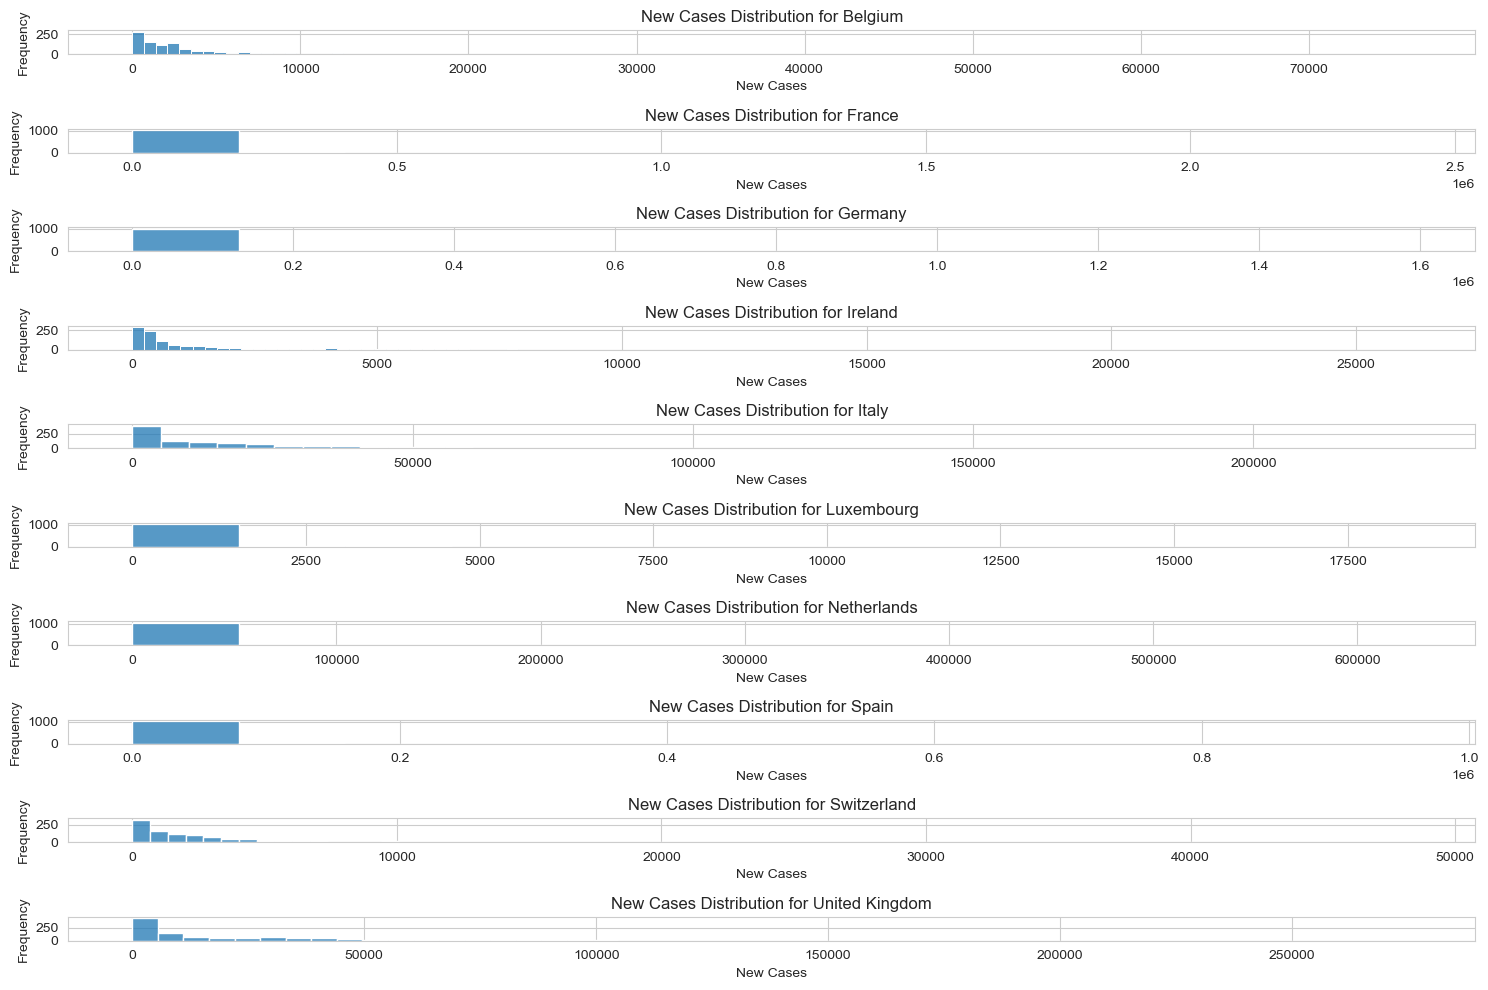

In [81]:
import seaborn as sns

sns.set_style("whitegrid")
countries = train['location'].unique()
plt.figure(figsize=(15, 10))

for i, country in enumerate(countries, 1):
    plt.subplot(len(countries), 1, i)
    sns.histplot(train[train['location'] == country]['new_cases'], kde=False)
    plt.title(f'New Cases Distribution for {country}')
    plt.xlabel('New Cases')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Bivariate Analysis

### Univariate Analysis